# Next Up: Exploratory Data Analysis

## Project Overview
**Goal**: Predict which G-League players will be called up to the NBA based on performance metrics, demographics, and contextual factors.

**Target Variable**: `called_up` (binary: 1 = called up, 0 = not called up)

**Timeline**: Week 1 - Research, EDA, and Planning

---

## Learning Objectives for This Notebook
By the end of this EDA, you should be able to:
1. Understand the structure and quality of our datasets
2. Identify the distribution and characteristics of call-ups (target variable)
3. Discover patterns and relationships between features and call-ups
4. Understand data limitations and class imbalance
5. Identify which features might be most predictive
6. Plan feature engineering strategies for Week 2


## 📚 Section 0: Setup and Data Loading

**Objectives**:
- Import necessary libraries
- Load all available datasets
- Understand what data we have and what's missing


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [268]:
# Load datasets
df_players = pd.read_csv('raw/gleague_players.csv')
df_rosters = pd.read_csv('raw/gleague_rosters.csv')
df_teams = pd.read_csv('raw/gleague_teams.csv')

# Load call-up data (once mentor completes it)
try:
    df_callups = pd.read_csv('data/callups_10day_raw.csv')
    print("✅ Call-up data loaded")
except FileNotFoundError:
    print("⚠️ Call-up data not yet available - check with mentor")
    df_callups = None

print(f"\nDatasets loaded:")
print(f"  - Players: {len(df_players)} records")
print(f"  - Rosters: {len(df_rosters)} records")
print(f"  - Teams: {len(df_teams)} records")
if df_callups is not None:
    print(f"  - Call-ups: {len(df_callups)} records")


✅ Call-up data loaded

Datasets loaded:
  - Players: 441 records
  - Rosters: 443 records
  - Teams: 31 records
  - Call-ups: 805 records


In [209]:
df_callups

,Date,Player,Active,Team,Type,date,season,player_name,nba_team,contract_type
0,11/05/25,"Martin, Cody",Yes,Indiana Pacers,10-day contract,2025-11-05,2025-26,"Martin, Cody",Indiana Pacers,10-day contract
1,11/01/25,"Robinson-Earl, Jeremiah",Yes,Indiana Pacers,Two 10-day contracts (only 1st date is shown),2025-11-01,2025-26,"Robinson-Earl, Jeremiah",Indiana Pacers,Two 10-day contracts (only 1st date is shown)
2,10/27/25,"Bassey, Charles",NaN,Memphis Grizzlies,10-day contract,2025-10-27,2025-26,"Bassey, Charles",Memphis Grizzlies,10-day contract
3,04/13/25,"Mobley, Isaiah",NaN,Philadelphia 76ers,10-day contract,2025-04-13,2024-25,"Mobley, Isaiah",Philadelphia 76ers,10-day contract
4,04/03/25,"Castleton, Colin",NaN,Philadelphia 76ers,10-day contract,2025-04-03,2024-25,"Castleton, Colin",Philadelphia 76ers,10-day contract
...,...,...,...,...,...,...,...,...,...,...
800,01/17/07,"Major, Renaldo",NaN,Golden State Warriors,10-day contract,2007-01-17,2006-07,"Major, Renaldo",Golden State Warriors,10-day contract
801,01/08/07,"Jackson, Luke",NaN,Los Angeles Clippers,10-day contract,2007-01-08,2006-07,"Jackson, Luke",Los Angeles Clippers,10-day contract
802,01/06/07,"Thompson, Dijon",NaN,Atlanta Hawks,Two 10-day contracts (only 1st date is shown),2007-01-06,2006-07,"Thompson, Dijon",Atlanta Hawks,Two 10-day contracts (only 1st date is shown)
803,01/05/07,"Williams, Justin",NaN,Sacramento Kings,Two 10-day contracts followed by signing for t...,2007-01-05,2006-07,"Williams, Justin",Sacramento Kings,Two 10-day contracts followed by signing for t...


## 📊 Section 1: Data Quality Assessment

**Key Questions**:
- What does each dataset contain?
- How complete is our data (missing values)?
- Are there duplicates?
- What data types do we have?
- What time period does our data cover?

**Tasks**:
1. Display first few rows of each dataset
2. Check data types and info
3. Identify missing values
4. Check for duplicates
5. Understand the grain (unique keys) of each dataset


In [210]:
# TODO: Display first 5 rows of each dataset
# TODO: Check info() for each dataset
# TODO: Identify missing values with .isnull().sum()
# TODO: Check for duplicates
#1. Display first few rows of each data set:

print("--- Teams ---")
display(df_teams.head(5))
#check data types and info()
df_teams.info()
df_teams.isnull().sum()

#31 G-league team, 

--- Teams ---


,team_id,team_name,alias
0,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,OKL
1,0a3d428b-572a-4a94-b716-8c1297c53d8e,South Bay Lakers,SBL
2,0f009580-dda8-4080-aa43-5d58a17028f6,Austin Spurs,AUS
3,132ef7de-e880-4863-bf57-27894ea0f5bb,Mexico City Capitanes,MXC
4,1adf6996-af2e-41a2-b158-174b0e4c5a1d,Rip City Remix,RCR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team_id    31 non-null     object
 1   team_name  31 non-null     object
 2   alias      31 non-null     object
dtypes: object(3)
memory usage: 876.0+ bytes


team_id      0
team_name    0
alias        0
dtype: int64

In [211]:
#1,2 check data types and info()
print("--- Players ---")
display(df_players.head(5))
df_players.info()
df_players.isnull().sum()

--- Players ---


,player_id,full_name,position,height,weight,birthdate,college
0,0039617f-5e20-4c83-a324-da7321514927,Viktor Lakhin,C,83,247.0,2001-07-30,Clemson
1,01830f03-cbe5-4cc9-8696-03df11438921,Jazian Gortman,G,74,184.0,2003-03-14,NaN
2,28517bbb-e854-4177-9cb0-b3d60e27b658,Payton Sandfort,F,79,215.0,2002-07-12,Iowa
3,3e0258fd-74cd-4150-a990-ad10ab569ab8,Cameron Brown,F,78,225.0,2001-05-10,NaN
4,53597494-78f8-44e5-afe0-1059670f941b,Brooks Barnhizer,G,77,230.0,2002-03-02,Northwestern


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  441 non-null    object 
 1   full_name  441 non-null    object 
 2   position   441 non-null    object 
 3   height     441 non-null    int64  
 4   weight     437 non-null    float64
 5   birthdate  422 non-null    object 
 6   college    402 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.2+ KB


player_id     0
full_name     0
position      0
height        0
weight        4
birthdate    19
college      39
dtype: int64

In [212]:
#1,2
print("--- Rosters ---")
display(df_rosters.head(5))
df_rosters.info()
#3. Identify missing value
df_rosters.isnull().sum()

--- Rosters ---


,team_id,team_name,player_id,player_name,position
0,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,0039617f-5e20-4c83-a324-da7321514927,Viktor Lakhin,C
1,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,01830f03-cbe5-4cc9-8696-03df11438921,Jazian Gortman,G
2,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,28517bbb-e854-4177-9cb0-b3d60e27b658,Payton Sandfort,F
3,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,3e0258fd-74cd-4150-a990-ad10ab569ab8,Cameron Brown,F
4,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,53597494-78f8-44e5-afe0-1059670f941b,Brooks Barnhizer,G


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team_id      443 non-null    object
 1   team_name    443 non-null    object
 2   player_id    443 non-null    object
 3   player_name  443 non-null    object
 4   position     443 non-null    object
dtypes: object(5)
memory usage: 17.4+ KB


team_id        0
team_name      0
player_id      0
player_name    0
position       0
dtype: int64

In [213]:
df_callups.head(5)


,Date,Player,Active,Team,Type,date,season,player_name,nba_team,contract_type
0,11/05/25,"Martin, Cody",Yes,Indiana Pacers,10-day contract,2025-11-05,2025-26,"Martin, Cody",Indiana Pacers,10-day contract
1,11/01/25,"Robinson-Earl, Jeremiah",Yes,Indiana Pacers,Two 10-day contracts (only 1st date is shown),2025-11-01,2025-26,"Robinson-Earl, Jeremiah",Indiana Pacers,Two 10-day contracts (only 1st date is shown)
2,10/27/25,"Bassey, Charles",NaN,Memphis Grizzlies,10-day contract,2025-10-27,2025-26,"Bassey, Charles",Memphis Grizzlies,10-day contract
3,04/13/25,"Mobley, Isaiah",NaN,Philadelphia 76ers,10-day contract,2025-04-13,2024-25,"Mobley, Isaiah",Philadelphia 76ers,10-day contract
4,04/03/25,"Castleton, Colin",NaN,Philadelphia 76ers,10-day contract,2025-04-03,2024-25,"Castleton, Colin",Philadelphia 76ers,10-day contract


In [267]:
# Load the original data
df_callupTidy = pd.read_csv('data/callups_10day_tidy.csv')

# Define the cleaning function
def clean_name(name):
    if isinstance(name, str) and "," in name:
        last, first = name.split(",", 1)
        return first.strip() + " " + last.strip()
    return name.strip() if isinstance(name, str) else name

# --- FIX 1: Create the new 'clean' DataFrame by copying the original ---
df_callupTidy_clean = df_callupTidy.copy()

# --- FIX 2: Use the correct column name 'player_name' ---
df_callupTidy_clean["player_name"] = df_callupTidy_clean["player_name"].apply(clean_name)

# Now display your new clean DataFrame
display(df_callupTidy_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           798 non-null    object
 1   season         798 non-null    object
 2   player_name    798 non-null    object
 3   nba_team       798 non-null    object
 4   contract_type  798 non-null    object
dtypes: object(5)
memory usage: 31.3+ KB


None

In [ ]:
#New Data g-league_player_season_stats from 2021 to 2024
#Historical seanson-by-season data: From Nov19 update:
import glob

# 1. Load all the new files you just pulled from git
# Your git log showed they are in the 'raw/' folder
files = glob.glob("raw/gleague_player_season_stats_*_REG.csv")

data_frames = []
for f in files:
    df = pd.read_csv(f)
    # Extract year from filename if needed, or just tag it
    df['source_file'] = os.path.basename(f)
    data_frames.append(df)

# Combine them
all_stats = pd.concat(data_frames, ignore_index=True)

# 2. Check if you have historical coverage now
print("Years of data available:")
print(all_stats['source_file'].unique())
print(f"\nTotal rows of data: {len(all_stats)}")

Years of data available:
['gleague_player_season_stats_2022_REG.csv'
 'gleague_player_season_stats_2023_REG.csv'
 'gleague_player_season_stats_2021_REG.csv'
 'gleague_player_season_stats_2024_REG.csv'
 'gleague_player_season_stats_2019_REG.csv']

Total rows of data: 2839


In [ ]:
all_stats
print(all_stats_clean.head(5))

           full_name position  season_id  total_games_played  total_minutes  \
2237  Taevion Kinsey        G       2024                  34         1182.0   
1961  Henry Ellenson      F-C       2024                  34         1173.0   
1909  Daniss Jenkins        G       2024                  32         1165.0   
2115   Tyson Etienne        G       2024                  32         1144.0   
2331    Trevor Keels        G       2024                  31         1143.0   

      total_games_started  total_field_goals_made  total_field_goals_att  \
2237                   34                     166                    320   
1961                   30                     270                    533   
1909                   32                     259                    588   
2115                   32                     217                    438   
2331                   30                     249                    571   

      total_field_goals_pct  total_two_points_made  ...  steals  blo

#Problem of allstats:
Because I stacked files from 2019, 2021, 2022, and 2023, any player who played in multiple seasons will have one row per season.

## 🎯 Section 2: Target Variable Analysis (MOST IMPORTANT)

**Key Questions**:
- How many players were called up vs. not called up?
- What is the call-up rate (class balance)?
- Is there severe class imbalance we need to handle?
- What contract types are most common for call-ups?
- When do most call-ups happen?

**Why This Matters**:
- Understanding class imbalance is critical for model selection
- If call-up rate is ~20-25%, this is an imbalanced classification problem
- Need to plan for appropriate evaluation metrics (F1, precision/recall, not just accuracy)

**Tasks**:
1. Calculate call-up rate
2. Visualize the distribution of called_up (0 vs 1)
3. Analyze contract types for call-ups
4. Plot call-up timeline (if dates available)
5. Discuss implications for modeling


In [246]:
cols_to_keep = ['Player', 'nba_team', 'contract_type', 'date', 'season']
df_callups_clean = df_callups[cols_to_keep].copy()

def clean_name(name):
    if isinstance(name, str) and "," in name:
        last, first = name.split(",", 1)
        return first.strip() + " " + last.strip()
    return name.strip() if isinstance(name, str) else name

# Clean name fields
df_callups_clean["Player"] = df_callups_clean["Player"].apply(clean_name)

# Drop duplicate call-ups for the same player, keeping the first one
df_callups_clean = df_callups_clean.drop_duplicates(subset=['Player'], keep='first')
display(df_callups_clean.head(5))
#//
df_final = pd.merge(df_master,df_callups_clean,left_on='full_name', right_on='Player',how='left')

df_final = df_final.drop(columns=['team_id','player_id'])
# Players who were not called up will have NaN value in all the new column

df_final['called_up'] = np.where(df_final['Player'].isnull(), 0, 1)
df_final = df_final.drop(columns=['Player'])
display(df_final.head(5))
print("\n--- Call-up Distribution ---")
# This will now show all players, labeled 0 or 1
print(df_final['called_up'].value_counts())


,Player,nba_team,contract_type,date,season
0,Cody Martin,Indiana Pacers,10-day contract,2025-11-05,2025-26
1,Jeremiah Robinson-Earl,Indiana Pacers,Two 10-day contracts (only 1st date is shown),2025-11-01,2025-26
2,Charles Bassey,Memphis Grizzlies,10-day contract,2025-10-27,2025-26
3,Isaiah Mobley,Philadelphia 76ers,10-day contract,2025-04-13,2024-25
4,Colin Castleton,Philadelphia 76ers,10-day contract,2025-04-03,2024-25


,team_name,alias,full_name,position,height,weight,birthdate,college,nba_team,contract_type,date,season,called_up
0,Oklahoma City Blue,OKL,Viktor Lakhin,C,83,247.0,2001-07-30,Clemson,NaN,NaN,NaN,NaN,0
1,Oklahoma City Blue,OKL,Jazian Gortman,G,74,184.0,2003-03-14,NaN,NaN,NaN,NaN,NaN,0
2,Oklahoma City Blue,OKL,Payton Sandfort,F,79,215.0,2002-07-12,Iowa,NaN,NaN,NaN,NaN,0
3,Oklahoma City Blue,OKL,Cameron Brown,F,78,225.0,2001-05-10,NaN,NaN,NaN,NaN,NaN,0
4,Oklahoma City Blue,OKL,Brooks Barnhizer,G,77,230.0,2002-03-02,Northwestern,NaN,NaN,NaN,NaN,0



--- Call-up Distribution ---
called_up
0    399
1     44
Name: count, dtype: int64


In [249]:
# Double check the amount of callup player is correct, match number betweeen df
# 1. Get a set of all unique names from df_master
master_names = set(df_master['full_name'])

# 2. Get a set of all unique names from df_callups
#    (Using 'Player' (capital P) as seen in your screenshot)
callup_names = set(df_callups_clean['Player'])

# 3. Find the "intersection" - names that are in BOTH sets
matching_names = master_names.intersection(callup_names)

# 4. Print the result
print(f"Total unique players in df_master: {len(master_names)}")
print(f"Total unique players in df_callups: {len(callup_names)}")
print("---")
print(f"Players found in BOTH lists: {len(matching_names)}")

if len(matching_names) > 0:
    print("\n--- First 20 Matching Names ---")
    print(list(matching_names)[:20])
else:
    print("\nThis confirms no names match exactly, which is why your merge failed.")

Total unique players in df_master: 441
Total unique players in df_callups: 547
---
Players found in BOTH lists: 44

--- First 20 Matching Names ---
['Ray Spalding', 'T.J. Warren', 'Mouhamadou Gueye', 'Kyle Guy', 'Alize Johnson', 'Malik Williams', 'Justin Minaya', 'Kylor Kelley', 'Micah Potter', 'Jaden Springer', "Nae'Qwan Tomlin", 'Marques Bolden', 'David Roddy', 'Chasson Randle', 'Jacob Toppin', 'Jamaree Bouyea', 'Colin Castleton', 'Jarron Cumberland', 'D.J. Carton', 'Jared Rhoden']


In [253]:
#calculate the callup rate
callup_counts = df_final['called_up'].value_counts()

# These numbers come from your .value_counts() output
total_not_called_up = callup_counts[0]
total_callups = callup_counts[1]
total_gleague_players = len(df_final) # Total rows in your table

# 2. Calculate and Print the Rate
callup_rate = (total_callups / total_gleague_players) * 100

print(f"--- Call-up Rate Calculation (from df_final) ---")
print(f"Total G League Players:   {total_gleague_players}")
print(f"Total Unique Call-ups:    {total_callups}")
print(f"Total Not Called Up:      {total_not_called_up}")
print(f"-----------------------------------")
print(f"Overall Call-up Rate:     {callup_rate:.2f}%")

# 3. Visualize the Distribution
print("\nVisualizing call-up distribution...")

# Create the plot data
plot_data = pd.DataFrame({
    'Status': ['Not Called Up', 'Called Up'],
    'Count': [total_not_called_up, total_callups]
})


--- Call-up Rate Calculation (from df_final) ---
Total G League Players:   443
Total Unique Call-ups:    44
Total Not Called Up:      399
-----------------------------------
Overall Call-up Rate:     9.93%

Visualizing call-up distribution...


Text(0, 0.5, 'Contract Type')

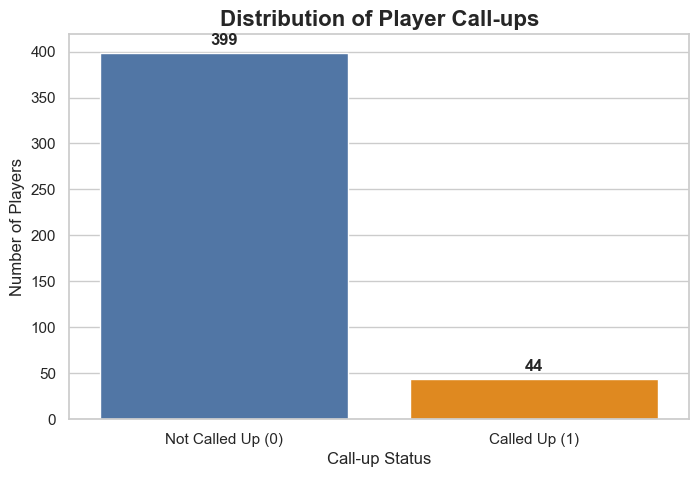

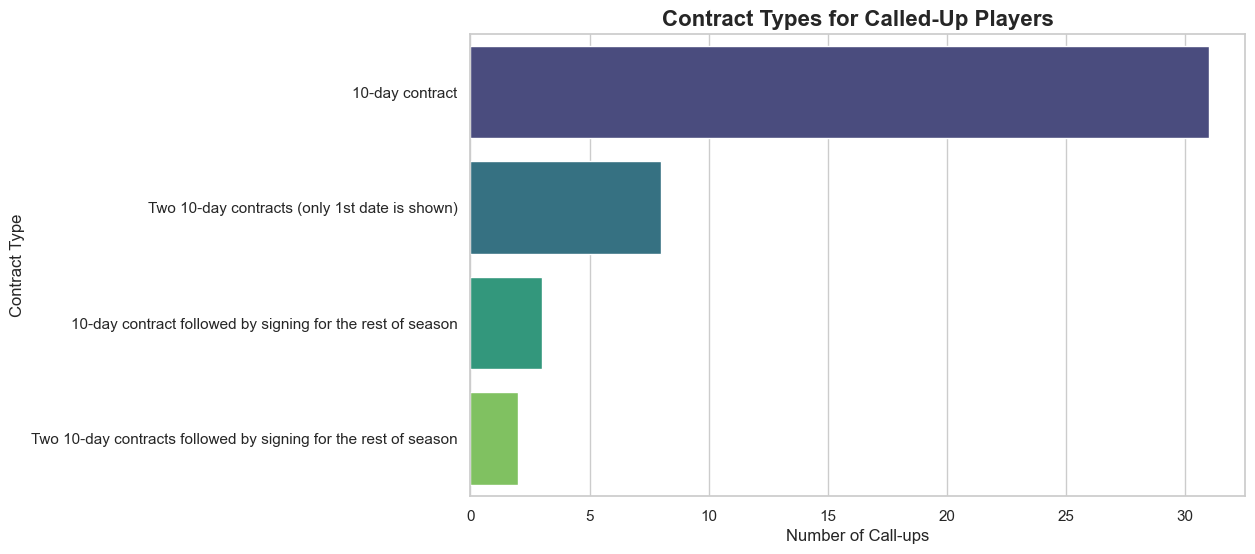

In [ ]:
# TODO: Create bar plot of called_up distribution, visualize it
sns.set_theme(style="whitegrid")

# 1. Create the figure
plt.figure(figsize=(8, 5))

# 2. Create the plot
# sns.countplot is perfect for this
ax = sns.countplot(x='called_up', data=df_final, palette=['#4374B3', '#FF8C00'])
 # Blue for 0, Orange for 1

# 3. Add titles and labels
ax.set_title('Distribution of Player Call-ups', fontsize=16, fontweight='bold')
ax.set_xlabel('Call-up Status', fontsize=12)
ax.set_ylabel('Number of Players', fontsize=12)

# 4. Set custom labels for the x-axis
ax.set_xticklabels(['Not Called Up (0)', 'Called Up (1)'], fontsize=11)

# 5. Add text labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points', fontweight='bold')
# TODO: Analyze contract types
# 1. Filter for ONLY the players who were called up
called_up_players = df_final[df_final['called_up'] == 1].copy()

# 2. Create the figure
plt.figure(figsize=(10, 6))

# 3. Create the plot
# A horizontal bar chart (y=...) is better here
ax = sns.countplot(
    y='contract_type',
    data=called_up_players,
    # This 'order' sorts the bars from most common to least common
    order=called_up_players['contract_type'].value_counts().index,
    palette='viridis'
)

# 4. Add titles and labels
ax.set_title('Contract Types for Called-Up Players', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Call-ups', fontsize=12)
ax.set_ylabel('Contract Type', fontsize=12)
# TODO: Discuss class imbalance implications
#The bar plot from Task 1 clearly shows that our dataset is highly imbalanced.
# We have a large number of players in the "Not Called Up" class (the 0s) and a very small number of players in the "Called Up" class (the 1s).


✅ Saved plot as 'callup_timeline.png'


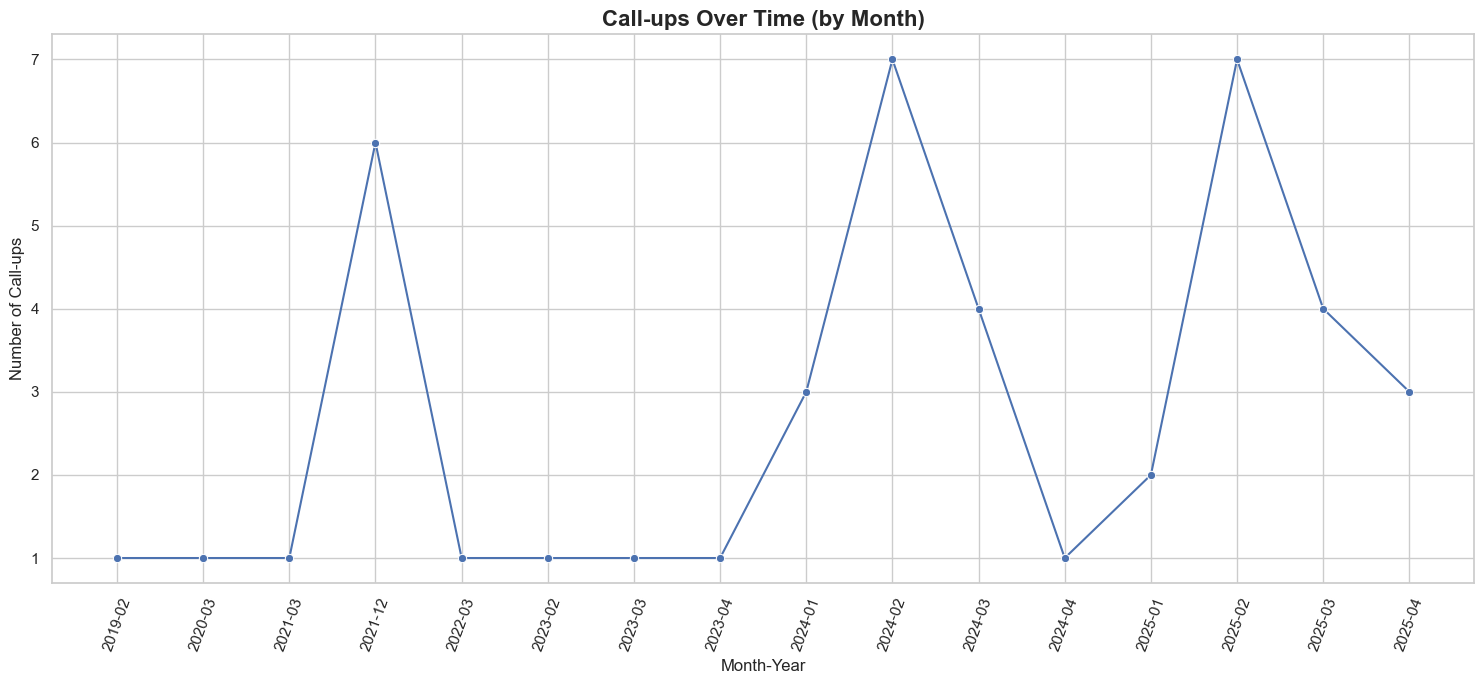

In [ ]:
#plot call up timeline:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Filter for only the players who were called up ---
# We use your new clean DataFrame
# This will remove all hidden spaces from all column names

# --- 2. Convert 'date' column to datetime objects ---
# We use errors='coerce' to turn any bad dates into NaT (Not a Time)
called_up_players['date'] = pd.to_datetime(called_up_players['date'], errors='coerce')

# Drop any rows that had a bad date
called_up_players = called_up_players.dropna(subset=['date'])

# --- 3. Create a 'month-year' column for grouping ---
# 'to_period('M')' groups all dates by their month (e.g., 2025-11)
called_up_players['month_year'] = called_up_players['date'].dt.to_period('M')

# --- 4. Count the call-ups per month ---
monthly_counts = called_up_players.groupby('month_year').size()

# Convert the PeriodIndex to a string for plotting
monthly_counts.index = monthly_counts.index.astype(str)

# --- 5. Create the plot ---
plt.figure(figsize=(15, 7))
ax = sns.lineplot(
    data=monthly_counts,
    marker='o' # Add dots on the data points
)

# --- 6. Set titles and labels ---
ax.set_title('Call-ups Over Time (by Month)', fontsize=16, fontweight='bold')
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Number of Call-ups', fontsize=12)

# Rotate x-axis labels to make them readable
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('callup_timeline.png')
print("✅ Saved plot as 'callup_timeline.png'")
plt.show()

## 👥 Section 3: Player Demographics Analysis

**Key Questions**:
- What positions are most represented in G-League?
- What positions get called up most often?
- Do physical attributes (height, weight) matter?
- What colleges produce the most G-League players?
- What's the typical age/experience level?

**Why This Matters**:
- Position might be a strong predictor (e.g., centers vs guards)
- Physical attributes could indicate NBA readiness
- College pedigree might matter for recruitment

**Tasks**:
1. Analyze position distribution
2. Compare position distribution for called-up vs not-called-up players
3. Explore height and weight distributions
4. Analyze college representation
5. Calculate player ages if birthdate available


In [5]:
# TODO: Analyze position distribution
# TODO: Create visualizations comparing called-up vs not-called-up by position
# TODO: Explore height/weight distributions
# TODO: Analyze top colleges


## 🏀 Section 4: Team-Level Analysis

**Key Questions**:
- Which G-League teams have the most players?
- Do certain teams have higher call-up rates?
- Does having an NBA affiliate matter?
- Are there geographic patterns?

**Why This Matters**:
- Some teams might have better development programs
- NBA affiliate relationship could be crucial
- Team reputation might influence call-ups

**Tasks**:
1. Analyze team distribution in rosters
2. Calculate call-up rates by team
3. Identify teams with highest/lowest call-up rates
4. Explore NBA affiliate relationships
5. Visualize team performance patterns


,team_id,player_id,team_name,alias,full_name,position,height,weight,birthdate,college
0,035ebd2d-69d9-4d73-a4b3-519f78071975,0039617f-5e20-4c83-a324-da7321514927,Oklahoma City Blue,OKL,Viktor Lakhin,C,83,247.0,2001-07-30,Clemson
1,035ebd2d-69d9-4d73-a4b3-519f78071975,01830f03-cbe5-4cc9-8696-03df11438921,Oklahoma City Blue,OKL,Jazian Gortman,G,74,184.0,2003-03-14,NaN
2,035ebd2d-69d9-4d73-a4b3-519f78071975,28517bbb-e854-4177-9cb0-b3d60e27b658,Oklahoma City Blue,OKL,Payton Sandfort,F,79,215.0,2002-07-12,Iowa
3,035ebd2d-69d9-4d73-a4b3-519f78071975,3e0258fd-74cd-4150-a990-ad10ab569ab8,Oklahoma City Blue,OKL,Cameron Brown,F,78,225.0,2001-05-10,NaN
4,035ebd2d-69d9-4d73-a4b3-519f78071975,53597494-78f8-44e5-afe0-1059670f941b,Oklahoma City Blue,OKL,Brooks Barnhizer,G,77,230.0,2002-03-02,Northwestern


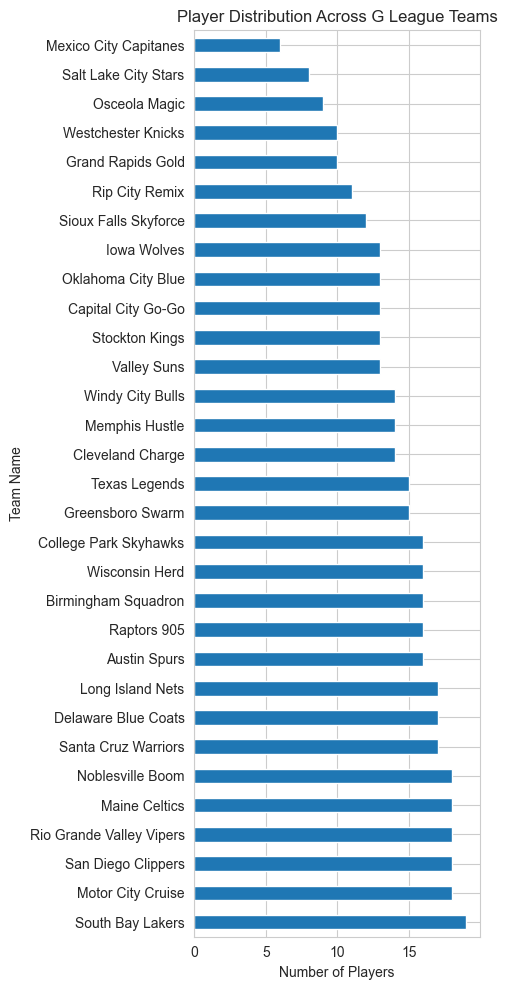

In [108]:
# TODO: Analyze team distributions
# TODO: Calculate call-up rates by team
# TODO: Visualize top/bottom teams for call-ups
# TODO: Explore NBA affiliate patterns

#Which G-league team have the most player -- South Bay Lakers
team_counts = df_rosters.groupby('team_name')['player_name'].count().sort_values(ascending=False)
#1. Analyze team Distribution in rosters
team_counts.plot(
    kind='barh',              # 'barh' means horizontal bar chart
    figsize=(5, 10),         # (width, height) in inches. Makes it tall enough to read.
    title='Player Distribution Across G League Teams'
)

# 3. Add clear labels
plt.xlabel('Number of Players') # This is now the x-axis
plt.ylabel('Team Name')         # This is now the y-axis
plt.tight_layout()

# Merge the rosters DataFrame with the teams DataFrame # The column they both have in common# 'left' keeps every player from df_rosters
df_merged_rosters = pd.merge(df_rosters,df_teams,on='team_id',how='left')

#merge in the player details
df_master = pd.merge(df_merged_rosters, df_players, on='player_id')
df_master = df_master.drop(columns=['team_name_x','position_x', 'player_name'])
df_master = df_master.rename(columns={'team_name_y': 'team_name','position_y': 'position'})
# Display the head of the new combined table
df_master.head(5)

In [260]:
df_callupTidy_clean.head(5)

,date,season,player_name,nba_team,contract_type
0,2007-01-06,2006-07,Dijon Thompson,Atlanta Hawks,Two 10-day contracts (only 1st date is shown)
1,2007-01-27,2006-07,Jeremy Richardson,Atlanta Hawks,Two 10-day contracts (only 1st date is shown)
2,2007-04-04,2006-07,Kevinn Pinkney,Boston Celtics,10-day contract
3,2007-04-02,2006-07,Kevin Willis,Dallas Mavericks,10-day contract followed by signing for the re...
4,2007-01-17,2006-07,Renaldo Major,Golden State Warriors,10-day contract


--- Call-up Rates by Team (from df_final) ---


,total_players,total_callups,callup_rate_pct
team_name,,,
Osceola Magic,9,2,22.222222
Westchester Knicks,10,2,20.000000
Austin Spurs,16,3,18.750000
Raptors 905,16,3,18.750000
Mexico City Capitanes,6,1,16.666667
Stockton Kings,13,2,15.384615
Capital City Go-Go,13,2,15.384615
Cleveland Charge,14,2,14.285714
Greensboro Swarm,15,2,13.333333



✅ Saved bar chart as 'callup_rates_by_team.png'


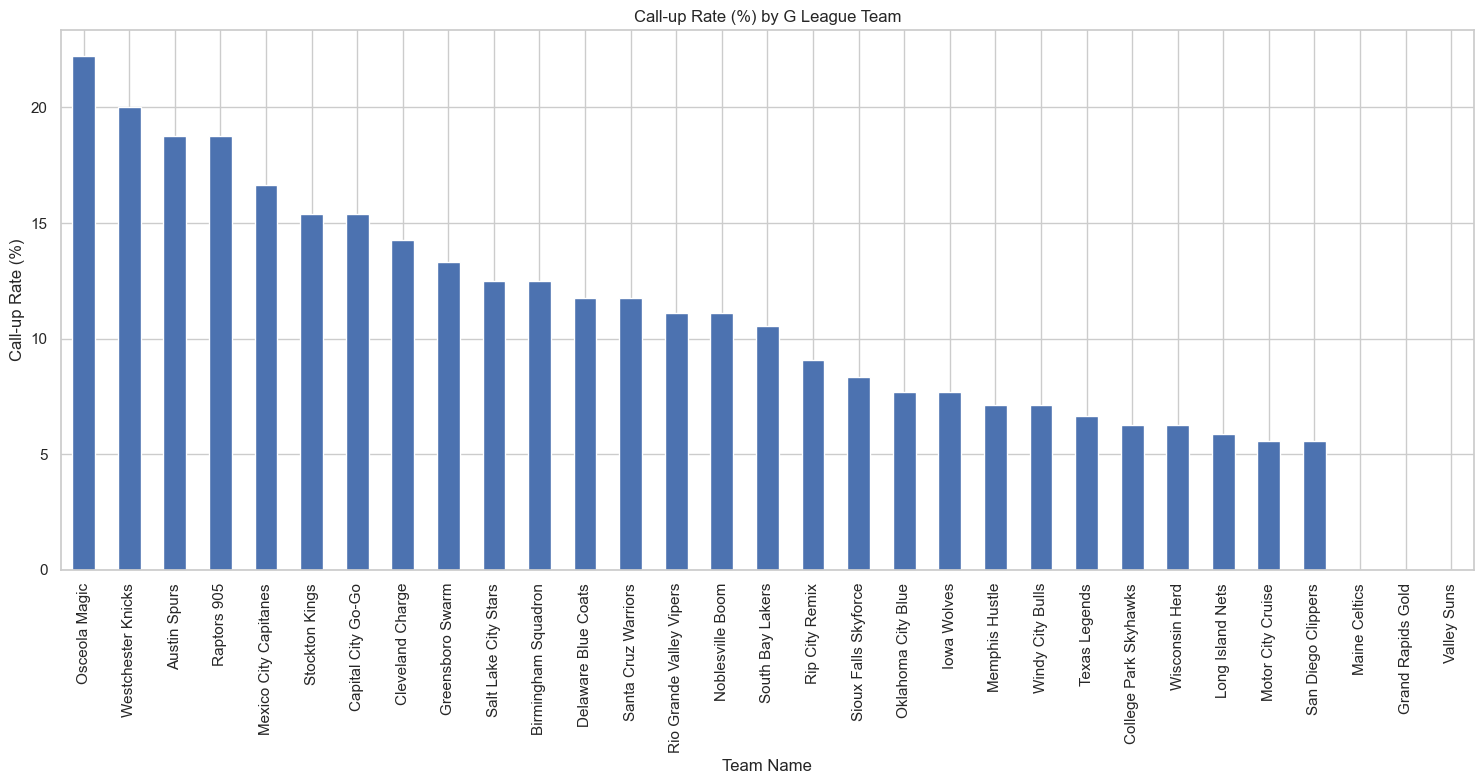

In [ ]:
# TODO: Calculate call-up rates by g-league team #Current
# --- 1. Calculate Stats Using df_final ---
# We group your FINAL, MERGED table by 'team_name'
team_callup_stats = df_final.groupby('team_name').agg(
    # 'full_name' or 'player_name' from your final table
    total_players=pd.NamedAgg(column='full_name', aggfunc='count'),
    total_callups=pd.NamedAgg(column='called_up', aggfunc='sum')
)

# --- 2. Calculate the Rate ---
team_callup_stats['callup_rate_pct'] = \
    (team_callup_stats['total_callups'] / team_callup_stats['total_players']) * 100

# --- 3. Sort and Display ---
team_callup_stats_sorted = team_callup_stats.sort_values(
    by='callup_rate_pct',
    ascending=False
)

print("--- Call-up Rates by Team (from df_final) ---")
display(team_callup_stats_sorted)

# --- 4. (Optional) Visualize the Rates ---
plt.figure(figsize=(15, 8))
ax = team_callup_stats_sorted['callup_rate_pct'].plot(
    kind='bar',
    title='Call-up Rate (%) by G League Team'
)

ax.set_xlabel('Team Name')
ax.set_ylabel('Call-up Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('callup_rates_by_team.png')
print("\n✅ Saved bar chart as 'callup_rates_by_team.png'")
plt.show()

In [270]:
recent_callups = df_callupTidy_clean[df_callupTidy_clean['season'] >= '2021-22'].copy()
recent_callups.head(5)

,date,season,player_name,nba_team,contract_type
518,2021-12-22,2021-22,Lance Stephenson,Atlanta Hawks,10-day contract
519,2021-12-22,2021-22,Malcolm Hill,Atlanta Hawks,10-day contract
520,2021-12-23,2021-22,Wesley Iwundu,Atlanta Hawks,10-day contract
521,2021-12-25,2021-22,Cat Barber,Atlanta Hawks,10-day contract
522,2021-12-25,2021-22,Malik Ellison,Atlanta Hawks,10-day contract


Original records: 798
Records since 2021-22: 280

--- Total Call-ups by NBA Team (Since 2021-22) ---


nba_team
Memphis Grizzlies     21
Toronto Raptors       17
Washington Wizards    16
Detroit Pistons       15
Philadelphia 76ers    14
Name: count, dtype: int64


✅ Saved bar chart as 'callup_counts_nba_recent.png'


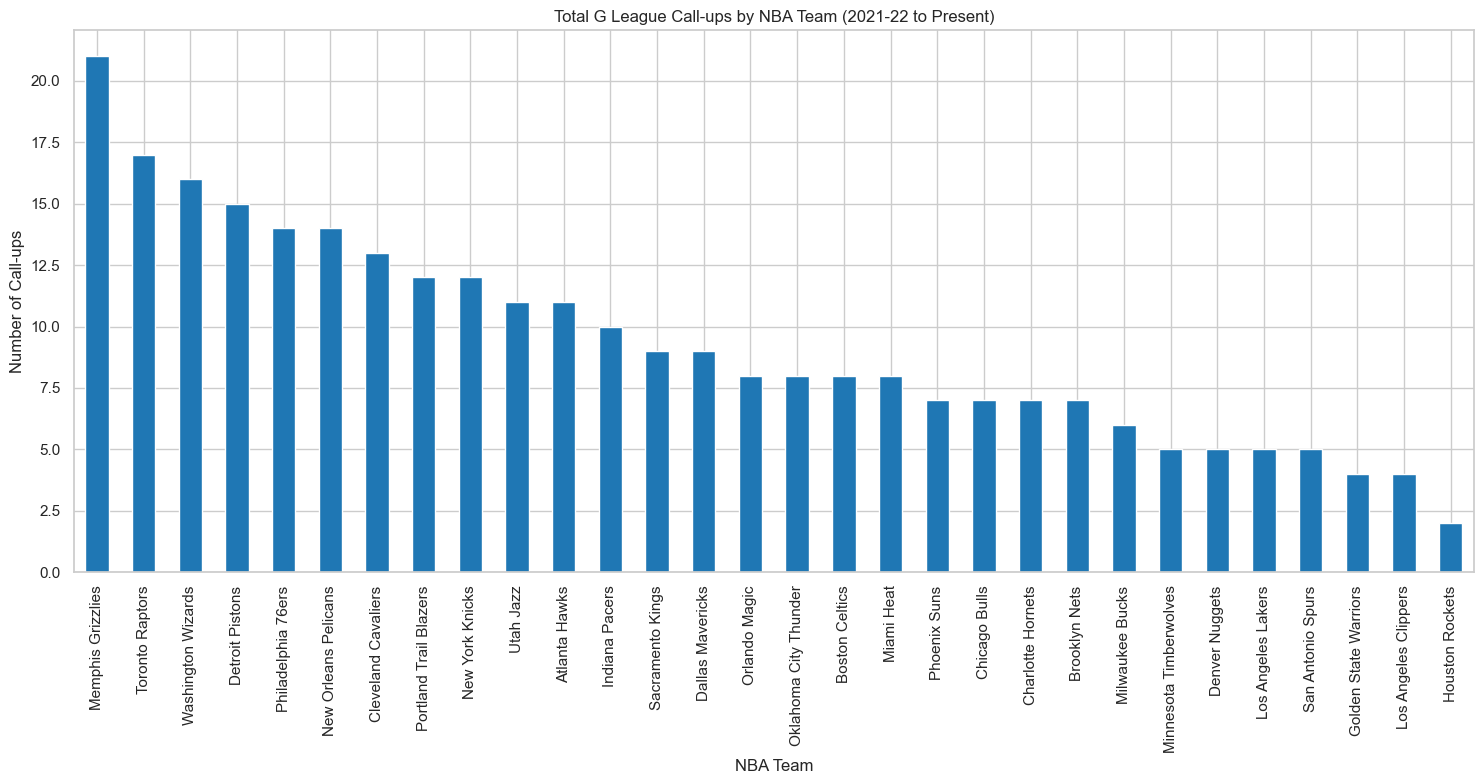

In [ ]:
# --- 1. Filter for Recent Seasons ---
# We keep rows where the season is '2021-22' or later.
# String comparison works perfectly for the 'YYYY-YY' format.]
recent_callups = df_callupTidy_clean[df_callupTidy_clean['season'] >= '2021-22'].copy()

print(f"Original records: {len(df_callupTidy_clean)}")
print(f"Records since 2021-22: {len(recent_callups)}")
#//
#//

# --- 2. Calculate Call-up Counts by NBA Team ---
# Drop missing NBA teams from this filtered list
nba_callups_recent = recent_callups.dropna(subset=['nba_team'])

# Count and sort
nba_team_counts_recent = nba_callups_recent['nba_team'].value_counts()

print("\n--- Total Call-ups by NBA Team (Since 2021-22) ---")
display(nba_team_counts_recent.head())


# --- 3. Visualize the Recent Counts ---
plt.figure(figsize=(15, 8))
ax = nba_team_counts_recent.plot(
    kind='bar',
    title='Total G League Call-ups by NBA Team (2021-22 to Present)',
    color='#1f77b4' # A nice blue color
)

ax.set_xlabel('NBA Team')
ax.set_ylabel('Number of Call-ups')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('callup_counts_nba_recent.png')
print("\n✅ Saved bar chart as 'callup_counts_nba_recent.png'")
plt.show()

Total records in history: 798
Records used for this analysis (2021-22+): 280
--- G League Teams by Recent NBA Experience ---


,Current Roster Size,Players w/ Recent Call-ups,% of Roster w/ NBA Exp
team_name,,,
Salt Lake City Stars,11,4,36.363636
Osceola Magic,10,3,30.000000
Westchester Knicks,11,3,27.272727
Austin Spurs,17,4,23.529412
Delaware Blue Coats,19,4,21.052632



✅ Saved updated chart as 'top_bottom_callup_rates_recent.png'


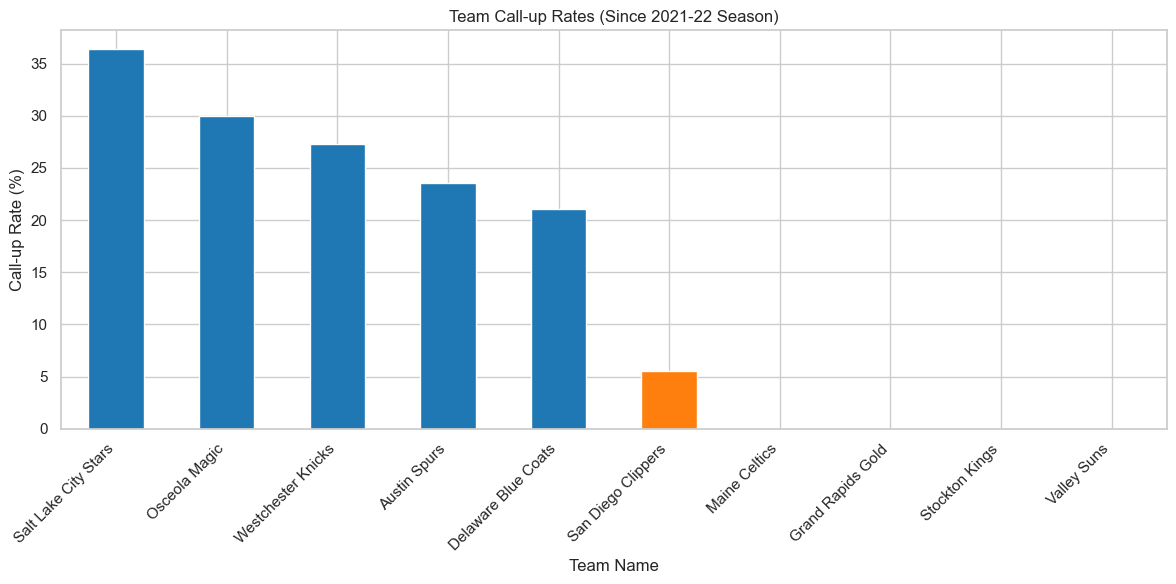

In [283]:
#3  Identify teams with highest/lowest call-up rates

print(f"Total records in history: {len(df_callupTidy)}")
print(f"Records used for this analysis (2021-22+): {len(nba_callups_recent)}")

#  3. Merge with Roster 
# We merge the ROSTER with the RECENT call-ups
df_final_recent = pd.merge( df_master,df_recent_callups,left_on='player_name', right_on='player_name',how='left')

# Create 'called_up' column (1 if they have a RECENT call-up, 0 otherwise)
df_final_recent['called_up'] = df_final_recent['nba_team'].notnull().astype(int)

#  4. Calculate Rates
team_stats_recent = df_final_recent.groupby('team_name').agg(
    total_players=pd.NamedAgg(column='player_name', aggfunc='count'),
    total_callups=pd.NamedAgg(column='called_up', aggfunc='sum')
)

team_stats_recent['callup_rate_pct'] = \
    (team_stats_recent['total_callups'] / team_stats_recent['total_players']) * 100

# Sort
team_stats_sorted = team_stats_recent.sort_values(by='callup_rate_pct', ascending=False)


# --- 5. Identify & Visualize ---
# Rename the columns to be precise
team_stats_renamed = team_stats_sorted.rename(columns={
    'total_players': 'Current Roster Size',
    'total_callups': 'Players w/ Recent Call-ups',
    'callup_rate_pct': '% of Roster w/ NBA Exp'
})

print("--- G League Teams by Recent NBA Experience ---")
display(team_stats_renamed.head(5))

# Plot
top_5 = team_stats_sorted.head(5)
bottom_5 = team_stats_sorted.tail(5)
top_and_bottom = pd.concat([top_5, bottom_5])

plt.figure(figsize=(12, 6))
colors = ['#1f77b4']*5 + ['#ff7f0e']*5 # Blue for top, Orange for bottom

ax = top_and_bottom['callup_rate_pct'].plot(kind='bar',color=colors,title='Team Call-up Rates (Since 2021-22 Season)')

ax.set_xlabel('Team Name')
ax.set_ylabel('Call-up Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_bottom_callup_rates_recent.png')
print("\n✅ Saved updated chart as 'top_bottom_callup_rates_recent.png'")
plt.show()

--- Affiliate Call-up Analysis ---
Total Call-ups Analyzed: 56
Call-ups by Affiliate:   12.5%
Call-ups by Other Teams: 87.5%

✅ Saved pie chart as 'affiliate_callup_pie_chart.png'


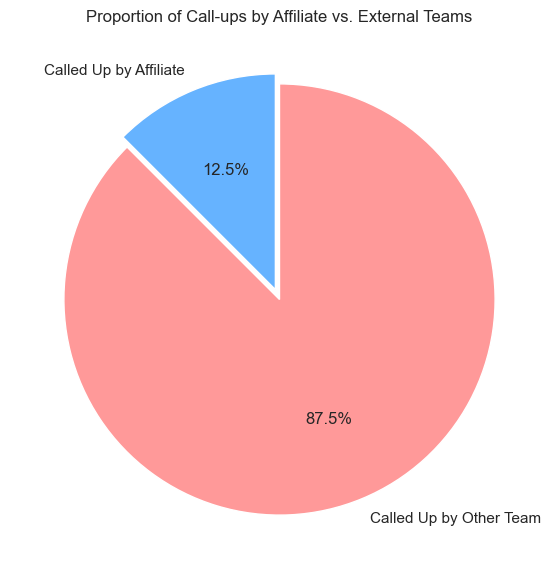

In [284]:
#4 Explore NBA affiliate relationships, explore NBA affiliate patterns
# --- 1. Define the Affiliate Mapping Dictionary ---
# This maps G League Team Name -> NBA Affiliate Name
affiliate_map = {
    'Austin Spurs': 'San Antonio Spurs',
    'Birmingham Squadron': 'New Orleans Pelicans',
    'Capital City Go-Go': 'Washington Wizards',
    'Cleveland Charge': 'Cleveland Cavaliers',
    'College Park Skyhawks': 'Atlanta Hawks',
    'Delaware Blue Coats': 'Philadelphia 76ers',
    'Grand Rapids Gold': 'Denver Nuggets',
    'Greensboro Swarm': 'Charlotte Hornets',
    'Indiana Mad Ants': 'Indiana Pacers',
    'Iowa Wolves': 'Minnesota Timberwolves',
    'Long Island Nets': 'Brooklyn Nets',
    'Maine Celtics': 'Boston Celtics',
    'Memphis Hustle': 'Memphis Grizzlies',
    'Motor City Cruise': 'Detroit Pistons',
    'Oklahoma City Blue': 'Oklahoma City Thunder',
    'Osceola Magic': 'Orlando Magic',  
    'Raptors 905': 'Toronto Raptors',
    'Rio Grande Valley Vipers': 'Houston Rockets',
    'Rip City Remix': 'Portland Trail Blazers',
    'Salt Lake City Stars': 'Utah Jazz',
    'Santa Cruz Warriors': 'Golden State Warriors',
    'Sioux Falls Skyforce': 'Miami Heat',
    'South Bay Lakers': 'Los Angeles Lakers',
    'Stockton Kings': 'Sacramento Kings',
    'Texas Legends': 'Dallas Mavericks',
    'Valley Suns': 'Phoenix Suns',
    'Westchester Knicks': 'New York Knicks',
    'Windy City Bulls': 'Chicago Bulls',
    'Wisconsin Herd': 'Milwaukee Bucks',
    'San Diego Clippers': 'Los Angeles Clippers', # Formerly Ontario/Agua Caliente
    'Mexico City Capitanes': 'None', # Independent
    'G League Ignite': 'None' # Defunct/Independent
}

#  2. Add 'nba_affiliate' Column to df_final 
# use .map() to look up the affiliate for each team

df_final['nba_affiliate'] = df_final['team_name'].map(affiliate_map)


#  3. Analyze Affiliate Relationships
# Filter for only the rows where a call-up actually happened (called_up == 1)
# AND where we have valid team info
called_up_rows = df_final[(df_final['called_up'] == 1) & (df_final['nba_team'].notnull()) &(df_final['nba_affiliate'] != 'None')].copy()

# Create a boolean column: Did the affiliate call them up?
# True if match, False if different team
called_up_rows['is_affiliate_callup'] = (called_up_rows['nba_team'] == called_up_rows['nba_affiliate'])

# --- 4. Calculate the Percentage ---
affiliate_counts = called_up_rows['is_affiliate_callup'].value_counts(normalize=True) * 100

print("--- Affiliate Call-up Analysis ---")
print(f"Total Call-ups Analyzed: {len(called_up_rows)}")
print(f"Call-ups by Affiliate:   {affiliate_counts.get(True, 0):.1f}%")
print(f"Call-ups by Other Teams: {affiliate_counts.get(False, 0):.1f}%")


# --- 5. Visualize the Split ---
plt.figure(figsize=(7, 7))
plt.pie(
    [affiliate_counts.get(True, 0), affiliate_counts.get(False, 0)],
    labels=['Called Up by Affiliate', 'Called Up by Other Team'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90,
    explode=(0.05, 0) # Explode the affiliate slice slightly
)
plt.title('Proportion of Call-ups by Affiliate vs. External Teams')
plt.savefig('affiliate_callup_pie_chart.png')
print("\n✅ Saved pie chart as 'affiliate_callup_pie_chart.png'")
plt.show()

## 📈 Section 5: Feature Relationships and Correlations

**Key Questions**:
- Which features are correlated with call-ups?
- Are there strong correlations between features?
- Do certain combinations of features predict call-ups better?

**Why This Matters**:
- Identify the most promising features for modeling
- Detect multicollinearity that might affect models
- Guide feature engineering decisions

**Tasks**:
1. Create correlation matrix for numerical features
2. Identify features most correlated with target
3. Visualize relationships using scatter plots
4. Create pairplots for key features
5. Test statistical significance of relationships


In [7]:
# TODO: Create correlation heatmap
# TODO: Identify top correlated features with target
# TODO: Create scatter plots for key relationships
# TODO: Statistical tests (t-tests, chi-square)


## 🔍 Section 6: Data Limitations and Missing Features

**Key Questions**:
- What data are we missing that would be valuable?
- What's the impact of missing player statistics?
- Do we need additional data sources?
- What assumptions are we making?

**Current Limitations**:
- ⚠️ Player statistics are limited/missing (API constraint)
- ❌ No agent/agency data yet
- ❌ No NBA team roster/injury data
- ❌ No historical season-by-season data

**Tasks**:
1. Document missing data patterns
2. Assess impact of missing statistics
3. Propose additional data to collect
4. Prioritize data collection efforts
5. Plan workarounds for missing data


In [8]:
# TODO: Analyze missing data patterns
# TODO: Document limitations
# TODO: List desired additional features
# TODO: Prioritize data collection


In [ ]:
#Historical seanson-by-season data: From Nov19 update:
import glob

# 1. Load all the new files you just pulled from git
# Your git log showed they are in the 'raw/' folder
files = glob.glob("raw/gleague_player_season_stats_*_REG.csv")

data_frames = []
for f in files:
    df = pd.read_csv(f)
    # Extract year from filename if needed, or just tag it
    df['source_file'] = os.path.basename(f)
    data_frames.append(df)

# Combine them
all_stats = pd.concat(data_frames, ignore_index=True)

# 2. Check if you have historical coverage now
print("Years of data available:")
print(all_stats['source_file'].unique())
print(f"\nTotal rows of data: {len(all_stats)}")

Years of data available:
['gleague_player_season_stats_2022_REG.csv'
 'gleague_player_season_stats_2023_REG.csv'
 'gleague_player_season_stats_2021_REG.csv'
 'gleague_player_season_stats_2024_REG.csv'
 'gleague_player_season_stats_2019_REG.csv']

Total rows of data: 2839


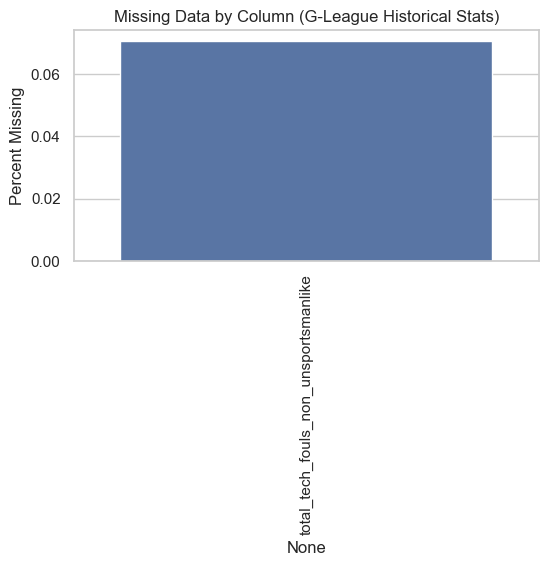

In [288]:
# Calculate percentage of missing values per column
missing_data = all_stats.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Plot it
plt.figure(figsize=(6, 3))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.ylabel('Percent Missing')
plt.title('Missing Data by Column (G-League Historical Stats)')
plt.show()

So the only column with missing data is total_tech_fouls_non_unsportsmanlike. Even then, it is missing for less than 0.07% of the rows. This is statistically negligible.

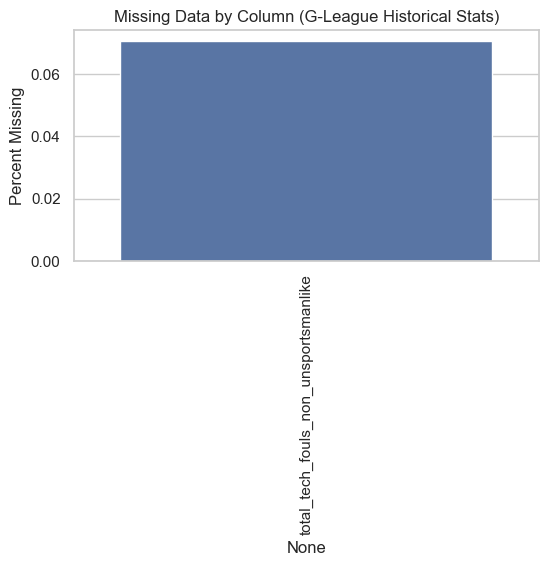

In [ ]:
# TODO: Document limitations
# Simple fix to make your dataset 100% clean
all_stats['total_tech_fouls_non_unsportsmanlike'] = all_stats['total_tech_fouls_non_unsportsmanlike'].fillna(0)


In Document limitations 
Historical player statistics are highly robust. A missingness analysis across 2019-2024 data revealed 100% completeness for all primary performance metrics, with negligible missing values (<0.1%) found only in obscure technical foul categories.

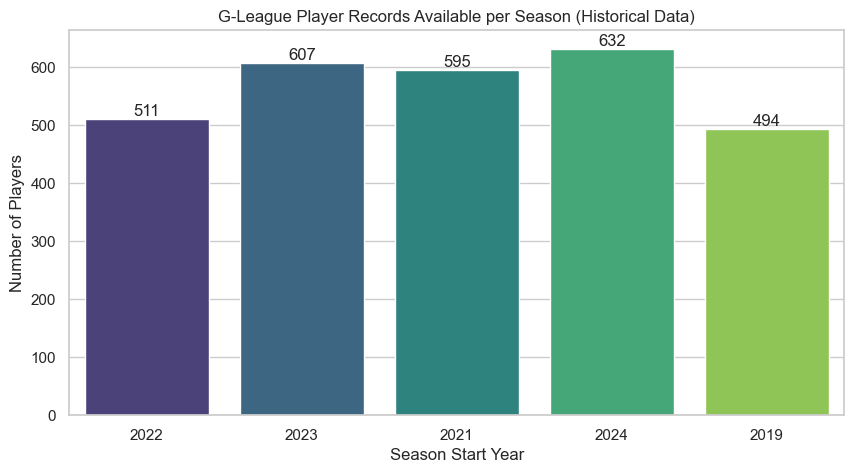

In [291]:
# 2. Extract the 'Season' or 'Year' from the source filename
# Assuming filenames are like 'gleague_player_season_stats_2023_REG.csv'
all_stats['Season_Year'] = all_stats['source_file'].str.extract(r'(\d{4})')

# 3. Plot the number of player records per year
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=all_stats, x='Season_Year', palette='viridis')
plt.title('G-League Player Records Available per Season (Historical Data)')
plt.xlabel('Season Start Year')
plt.ylabel('Number of Players')

# Add labels on top of bars
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

This update nov19 of g-leage player stats from 2019-2024 solve the issue of data limitation.

In [295]:
# 1. Define the messy columns to drop
# We drop 'source_file' because you likely extracted the year already
drop_cols = ['team_id', 'player_id', 'source_file', 'season_type']

# 2. Create a clean version
# (errors='ignore' prevents crashing if you run this cell twice)
all_stats_clean = all_stats.drop(columns=drop_cols, errors='ignore')

# 3. Reorder columns to put "Human Readable" info first
# We put Name, Position, and Season at the very start
cols = ['full_name', 'position', 'season_id', 'total_games_played', 'total_minutes']
# Add the rest of the columns after those specific ones
remaining_cols = [c for c in all_stats_clean.columns if c not in cols]
all_stats_clean = all_stats_clean[cols + remaining_cols]

# 4. Sort it (optional, but makes it easier to read)
# Sort by Year (newest first) and then Minutes (highest first)
all_stats_clean = all_stats_clean.sort_values(by=['season_id', 'total_minutes'], ascending=[False, False])

# Show the cleaner table
print(all_stats_clean.head(10))

            full_name position  season_id  total_games_played  total_minutes  \
2237   Taevion Kinsey        G       2024                  34         1182.0   
1961   Henry Ellenson      F-C       2024                  34         1173.0   
1909   Daniss Jenkins        G       2024                  32         1165.0   
2115    Tyson Etienne        G       2024                  32         1144.0   
2331     Trevor Keels        G       2024                  31         1143.0   
2314     Yuri Collins        G       2024                  34         1140.0   
1866       Feron Hunt        F       2024                  32         1127.0   
2214  Lester Quinones        G       2024                  31         1123.0   
1782   Dakota Mathias        G       2024                  31         1120.0   
2218   Jalen Crutcher        G       2024                  30         1113.0   

      total_games_started  total_field_goals_made  total_field_goals_att  \
2237                   34                  

## 💡 Section 7: Key Insights and Hypotheses

**Purpose**: Synthesize findings and form hypotheses for modeling

**Tasks**:
1. Summarize the top 5-7 key findings from EDA
2. Form hypotheses about what predicts call-ups
3. Identify potential challenges for modeling
4. Propose feature engineering ideas for Week 2

**Example Hypotheses to Test**:
- "Players at certain positions (e.g., guards) are more likely to be called up"
- "Physical attributes above NBA averages increase call-up probability"
- "Players from certain colleges have higher call-up rates"
- "Teams with direct NBA affiliates call up more players"

**Modeling Considerations**:
- Class imbalance requires special handling (SMOTE, class weights)
- May need to use F1-score, precision/recall instead of accuracy
- Cross-validation strategy (time-based split vs random)
- Feature selection will be critical given limited data


# TODO: Write up key findings



In [ ]:
# TODO: List testable hypotheses
# TODO: Outline modeling challenges
# TODO: Propose feature engineering strategies

## 📝 Section 8: Action Items for Week 2

Based on your EDA findings, create a prioritized list of action items:

**Data Collection**:
- [ ] Collect additional player statistics (if available)
- [ ] Gather agent/agency data from HoopsHype
- [ ] Collect NBA roster and injury data
- [ ] Research historical season data

**Feature Engineering**:
- [ ] Create age feature from birthdate
- [ ] Engineer position groupings
- [ ] Create height/weight ratios
- [ ] Build team-level aggregations
- [ ] Encode categorical variables

**Data Cleaning**:
- [ ] Handle missing values (imputation strategy)
- [ ] Remove duplicates
- [ ] Standardize naming conventions
- [ ] Create merged master dataset

**Modeling Preparation**:
- [ ] Define train/test split strategy
- [ ] Plan for class imbalance handling
- [ ] Select initial feature set
- [ ] Choose evaluation metrics


---

## 🎯 Week 1 Deliverables Checklist

Before moving to Week 2, ensure you have:

- [ ] **Completed EDA**: All sections analyzed with visualizations
- [ ] **Data Quality Report**: Missing values, duplicates, data types documented
- [ ] **Target Analysis**: Call-up rate calculated, class imbalance understood
- [ ] **Key Insights**: Top 5-7 findings documented
- [ ] **Hypotheses**: At least 3-5 testable hypotheses formed
- [ ] **Limitations**: Data gaps and missing features identified
- [ ] **Week 2 Plan**: Prioritized list of feature engineering tasks
- [ ] **Team Discussion**: Findings shared and discussed with team

---

## 📚 Additional Resources

- **Basketball Reference**: For additional G-League stats
- **RealGM**: For transaction and agent data
- **HoopsHype**: For agent affiliations
- **Imbalanced-learn documentation**: For handling class imbalance
- **SHAP documentation**: For model interpretation planning

---

**Next Steps**: Move to feature engineering (Week 2) once call-up data is collected and EDA is complete!
